# SuperStore Python 2#

## Question ##

Create Some Exploration Data from Data Set ​Super Store
<ol>
<li>Visualize trend order in 2017</li>
<li>Generate list customers who order Furniture
categories ​but didn’t order​ Office Supplies in
2017. How Many Users did?. (Clue: Every
customer can purchase more than 1 category; It
can be solved using merge function
(how=’left’)).</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import statsmodels.api as sm

In [2]:
#read file csv
df = pd.read_csv('superstore.csv')

In [3]:
df.head()

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,1,6/12/2017,CA-2017-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,2,West,14.6200,Corporate,6/16/2017,Second Class,California,Labels
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,1,10/11/2016,US-2016-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-383.0310,5,South,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,1,10/11/2016,US-2016-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,2.5164,2,South,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage


In [4]:
#row,column count of data
df.shape

(9994, 20)

In [5]:
#column names of table
df.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Postal Code',
       'Manufacturer', 'Product Name', 'Profit', 'Quantity', 'Region', 'Sales',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Sub-Category'],
      dtype='object')

In [6]:
#check data type of columns/attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           9994 non-null   object 
 1   City               9994 non-null   object 
 2   Country            9994 non-null   object 
 3   Customer Name      9994 non-null   object 
 4   Discount           9994 non-null   float64
 5   Number of Records  9994 non-null   int64  
 6   Order Date         9994 non-null   object 
 7   Order ID           9994 non-null   object 
 8   Postal Code        9983 non-null   float64
 9   Manufacturer       9994 non-null   object 
 10  Product Name       9994 non-null   object 
 11  Profit             9994 non-null   float64
 12  Quantity           9994 non-null   int64  
 13  Region             9994 non-null   object 
 14  Sales              9994 non-null   float64
 15  Segment            9994 non-null   object 
 16  Ship Date          9994 

In [7]:
#Check missing value
df.isnull().sum()

Category              0
City                  0
Country               0
Customer Name         0
Discount              0
Number of Records     0
Order Date            0
Order ID              0
Postal Code          11
Manufacturer          0
Product Name          0
Profit                0
Quantity              0
Region                0
Sales                 0
Segment               0
Ship Date             0
Ship Mode             0
State                 0
Sub-Category          0
dtype: int64

In [8]:
#convert column Order Date from string to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
#add new column year from Order Date
#df['month'] = pd.DatetimeIndex(df['Order Date']).month
df['Year'] = pd.DatetimeIndex(df['Order Date']).year

In [10]:
df.head()

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,...,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category,Year
0,Furniture,Henderson,United States,Claire Gute,0.00,1,2017-11-08,CA-2017-152156,42420.0,Bush,...,41.9136,2,South,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases,2017
1,Furniture,Henderson,United States,Claire Gute,0.00,1,2017-11-08,CA-2017-152156,42420.0,Hon,...,219.5820,3,South,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs,2017
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,1,2017-06-12,CA-2017-138688,90036.0,Universal,...,6.8714,2,West,14.6200,Corporate,6/16/2017,Second Class,California,Labels,2017
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,1,2016-10-11,US-2016-108966,33311.0,Bretford,...,-383.0310,5,South,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables,2016
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,1,2016-10-11,US-2016-108966,33311.0,Eldon,...,2.5164,2,South,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage,2016


In [11]:
#df['Year'].unique()
df_2017 = df[(df['Year'] == 2017)]
df_2017.head()

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,...,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category,Year
0,Furniture,Henderson,United States,Claire Gute,0.0,1,2017-11-08,CA-2017-152156,42420.0,Bush,...,41.9136,2,South,261.960,Consumer,11/11/2017,Second Class,Kentucky,Bookcases,2017
1,Furniture,Henderson,United States,Claire Gute,0.0,1,2017-11-08,CA-2017-152156,42420.0,Hon,...,219.5820,3,South,731.940,Consumer,11/11/2017,Second Class,Kentucky,Chairs,2017
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.0,1,2017-06-12,CA-2017-138688,90036.0,Universal,...,6.8714,2,West,14.620,Corporate,6/16/2017,Second Class,California,Labels,2017
13,Office Supplies,Seattle,United States,Irene Maddox,0.2,1,2017-12-05,CA-2017-161389,98103.0,Fellowes,...,132.5922,3,West,407.976,Consumer,12/10/2017,Standard Class,Washington,Binders,2017
21,Office Supplies,Fremont,United States,Ken Black,0.0,1,2017-12-09,CA-2017-137330,68025.0,Newell,...,5.0596,7,Central,19.460,Corporate,12/13/2017,Standard Class,Nebraska,Art,2017


In [12]:
df_2017_group = df_2017.groupby(['Order Date']).agg({'Order ID': ['count']}).reset_index().droplevel(level=0, axis=1)
df_2017_group.columns = ['Date', 'Total Order']
df_2017_group_sort = df_2017_group.sort_values(by='Date', ascending = False)
df_2017_group_sort

,Date,Total Order
318,2017-12-31,7
317,2017-12-30,8
316,2017-12-29,12
315,2017-12-27,7
314,2017-12-26,13
...,...,...
4,2017-01-07,3
3,2017-01-05,3
2,2017-01-04,3
1,2017-01-03,6


**Trend Order in 2017**

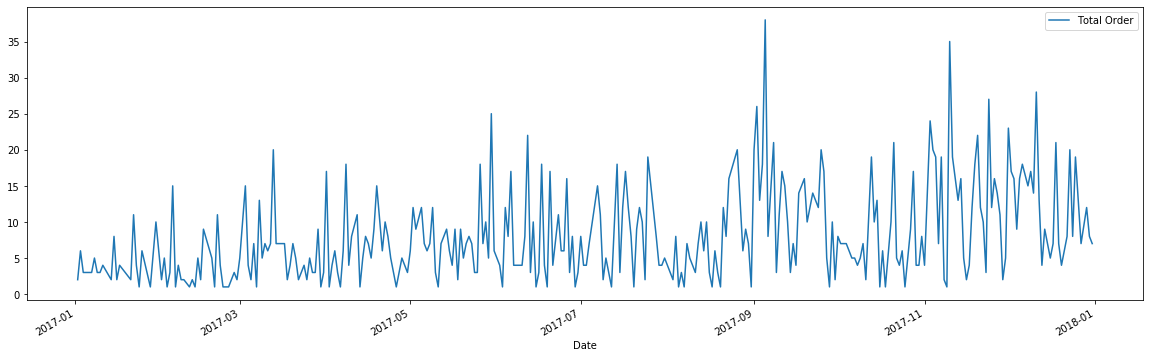

In [13]:
df_2017_group_sort.plot.line(x='Date', y = 'Total Order', figsize=(20,6))

**List Customer Where Buy Furniture or Technology Category but didn’t order Office Supplies in 2017**

In [14]:
#Create List Category + Customer Name in 2017 
df_2017_FurnitureTech = df[(df['Year'] == 2017) & ((df['Category'] == 'Furniture') | (df['Category'] == 'Technology'))][['Category', 'Customer Name']].sort_values(by='Customer Name')
df_2017_OffSupplies = df[(df['Year'] == 2017) & (df['Category'] == 'Office Supplies')][['Category', 'Customer Name']].sort_values(by='Customer Name').sort_values(by='Customer Name')

In [15]:
#Remove duplicate Category + Customer Name
df_1 = df_2017_FurnitureTech.drop_duplicates(subset = ['Category', 'Customer Name'])
df_2 = df_2017_OffSupplies.drop_duplicates(subset = ['Category', 'Customer Name'])

In [16]:
#Check Count Record
df_1.shape

(645, 2)

In [17]:
#Check Count Record
df_2.shape

(545, 2)

In [18]:
#Left Join 
df_result = df_1.merge(df_2, how='left', left_on=['Customer Name'], right_on=['Customer Name']).fillna(0)
df_result[(df_result['Category_y'] == 0)]

,Category_x,Customer Name,Category_y
0,Furniture,Aaron Bergman,0
1,Technology,Aaron Bergman,0
2,Furniture,Aaron Hawkins,0
11,Furniture,Adrian Shami,0
12,Technology,Alan Schoenberger,0
...,...,...,...
628,Technology,Victoria Pisteka,0
629,Furniture,Victoria Pisteka,0
630,Technology,Victoria Wilson,0
631,Furniture,Victoria Wilson,0
